In [1]:
## Import necessary librarise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#read cvs file
#df = pd.read_csv('C:\\Lincolnuni\\COMP_647\\project_1\\comp647\\dataset\\raw\\crop_yield_dataset.csv')
df = pd.read_csv('../dataset/processed/crop_yield_cleansing_data_01.csv')

# Display the first 5 rows
df.head()

Date Crop_Type Soil_Type  Soil_pH  Temperature  Humidity  Wind_Speed  \
0  2014-01-01     Wheat     Peaty     5.50            9        80          11   
1  2014-01-01      Corn     Loamy     6.50           20        80           9   
2  2014-01-01      Rice     Peaty     5.50           12        80           7   
3  2014-01-01    Barley     Sandy     6.75           20        80           3   
4  2014-01-01   Soybean     Peaty     5.50           16        80           8   

      N     P     K  Crop_Yield  Soil_Quality  Year  Month  Day  \
0  60.5  45.0  31.5    0.000000            23  2014      1    1   
1  84.0  66.0  50.0  104.871310            67  2014      1    1   
2  71.5  54.0  38.5    0.000000            27  2014      1    1   
3  50.0  40.0  30.0   58.939796            35  2014      1    1   
4  49.5  45.0  38.5   32.970413            22  2014      1    1   

   Temperature_orig  Humidity_orig  Wind_Speed_orig  Soil_Quality_orig  
0          9.440599      80.000000        10.956707          22.833333  
1         20.052576      79.947424         8.591577          66.666667  
2         12.143099      80.000000         7.227751          27.333333  
3         19.751848      80.000000         2.682683          35.000000  
4         16.110395      80.000000         7.696070          22.166667

In [3]:
print(df.isnull().sum())

Date                 0
Crop_Type            0
Soil_Type            0
Soil_pH              0
Temperature          0
Humidity             0
Wind_Speed           0
N                    0
P                    0
K                    0
Crop_Yield           0
Soil_Quality         0
Year                 0
Month                0
Day                  0
Temperature_orig     0
Humidity_orig        0
Wind_Speed_orig      0
Soil_Quality_orig    0
dtype: int64


In [4]:
#Print data info (data types, non-null counts, memory usage)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               36520 non-null  object 
 1   Crop_Type          36520 non-null  object 
 2   Soil_Type          36520 non-null  object 
 3   Soil_pH            36520 non-null  float64
 4   Temperature        36520 non-null  int64  
 5   Humidity           36520 non-null  int64  
 6   Wind_Speed         36520 non-null  int64  
 7   N                  36520 non-null  float64
 8   P                  36520 non-null  float64
 9   K                  36520 non-null  float64
 10  Crop_Yield         36520 non-null  float64
 11  Soil_Quality       36520 non-null  int64  
 12  Year               36520 non-null  int64  
 13  Month              36520 non-null  int64  
 14  Day                36520 non-null  int64  
 15  Temperature_orig   36520 non-null  float64
 16  Humidity_orig      365

In [5]:
#Display summary statistics for numerical columns
print(df.describe())

            Soil_pH   Temperature      Humidity    Wind_Speed             N  \
count  36520.000000  36520.000000  36520.000000  36520.000000  36520.000000   
mean       6.602731     23.811528     74.259502     10.021440     66.011035   
std        0.816973      8.926331      6.772669      3.010711     10.886721   
min        5.500000     -4.000000     46.000000     -3.000000     45.000000   
25%        6.250000     17.000000     70.000000      8.000000     58.500000   
50%        6.500000     23.000000     77.000000     10.000000     65.000000   
75%        6.750000     30.000000     80.000000     12.000000     71.500000   
max        8.000000     54.000000     80.000000     23.000000     91.000000   

                  P            K    Crop_Yield  Soil_Quality          Year  \
count  36520.000000  36520.00000  36520.000000  36520.000000  36520.000000   
mean      53.014006     42.01825     26.878480     37.530367   2018.499726   
std        8.812884      8.53781     25.740936     17.

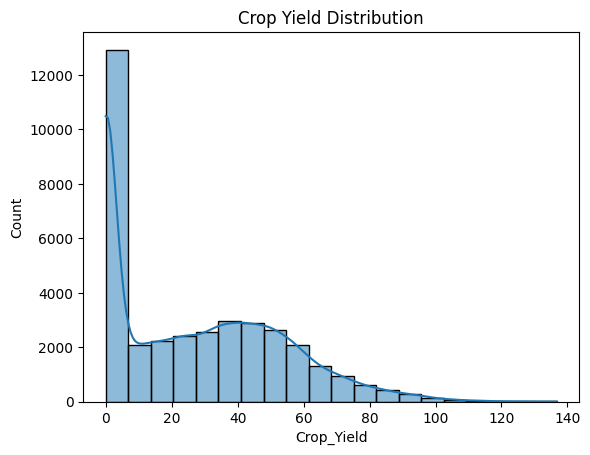

In [6]:
# Crop Yield distribution
sns.histplot(df['Crop_Yield'], kde=True, bins=20)
plt.title("Crop Yield Distribution")
plt.show()

### Insights from the graph
1. The Crop_Yield data is highly skewed, with a very large proportion of values equal to zero.

  Crop_Type  Year  Crop_Yield
0    Barley  2014   24.932251
1    Barley  2015   24.955955
2    Barley  2016   24.531108
3    Barley  2017   26.245359
4    Barley  2018   24.827279


Text(0, 0.5, 'Average Crop Yield')

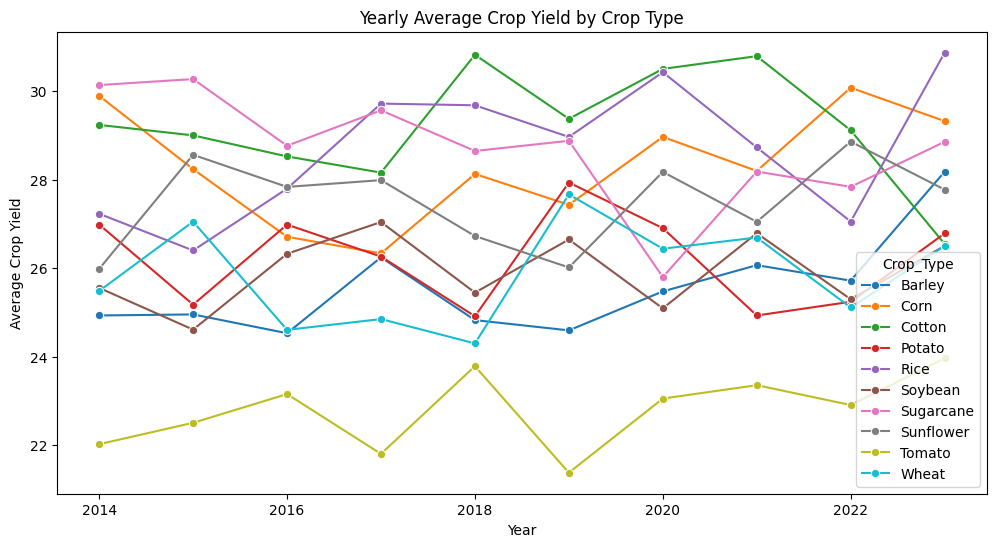

In [7]:
# Group the data by Crop_Type and Year, then calculate the average Crop_Yield
grouped = df.groupby(['Crop_Type', 'Year'])['Crop_Yield'].mean().reset_index()
print(grouped.head())

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Plot a line chart showing average crop yield per year by crop type
sns.lineplot(data=grouped, x='Year', y='Crop_Yield', hue='Crop_Type', marker='o')
plt.title("Yearly Average Crop Yield by Crop Type")
plt.xlabel("Year")
plt.ylabel("Average Crop Yield")

### Insights from the graph
1. Among the different crop types, cotton shows one of the highest average yields.
2. Among the various crop types, tomato shows one of the lowest average yields.
3. The trend in crop yield varies by crop type, with certain crops experiencing growth and others showing a downward trend during the same period. 
**Further analysis is needed to understand which factors are contributing to the variation in crop yield.**

C:\Users\james\AppData\Local\Temp\ipykernel_29612\668441828.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='Temperature', y='Crop_Yield', palette='viridis')


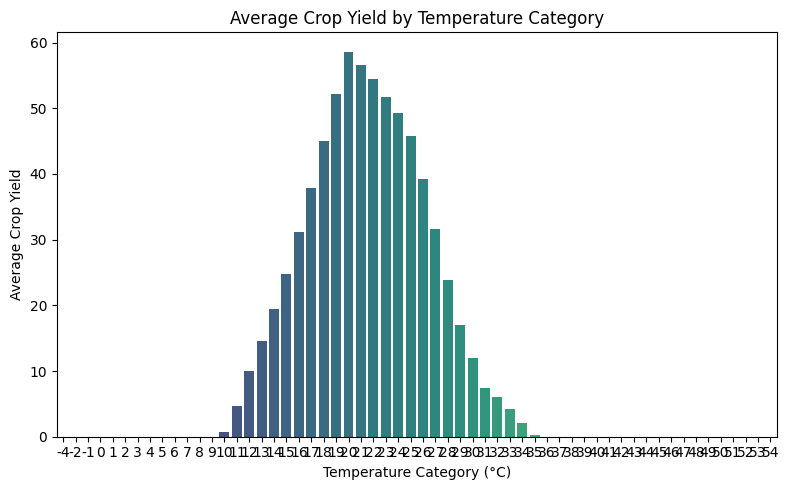

In [8]:
# Calculate mean Crop_Yield per temperature category
grouped = df.groupby('Temperature')['Crop_Yield'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='Temperature', y='Crop_Yield', palette='viridis')

plt.title("Average Crop Yield by Temperature Category")
plt.xlabel("Temperature Category (°C)")
plt.ylabel("Average Crop Yield")
plt.tight_layout()
plt.show()

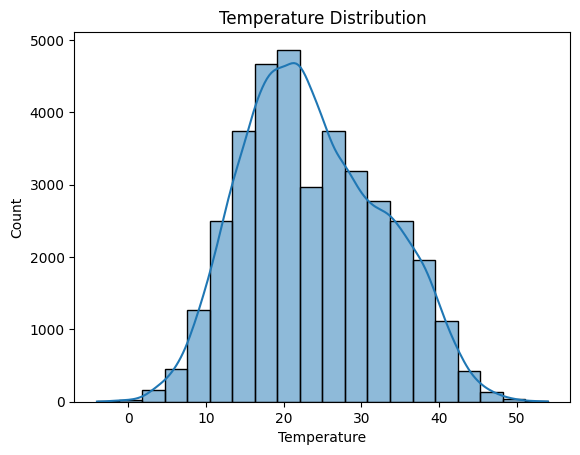

In [9]:
# Histogram: Show the distribution of Temperature values
# bins=20 → split into 20 intervals / kde=True → add KDE curve
sns.histplot(df['Temperature'], bins=20, kde=True)
plt.title("Temperature Distribution")
plt.show()

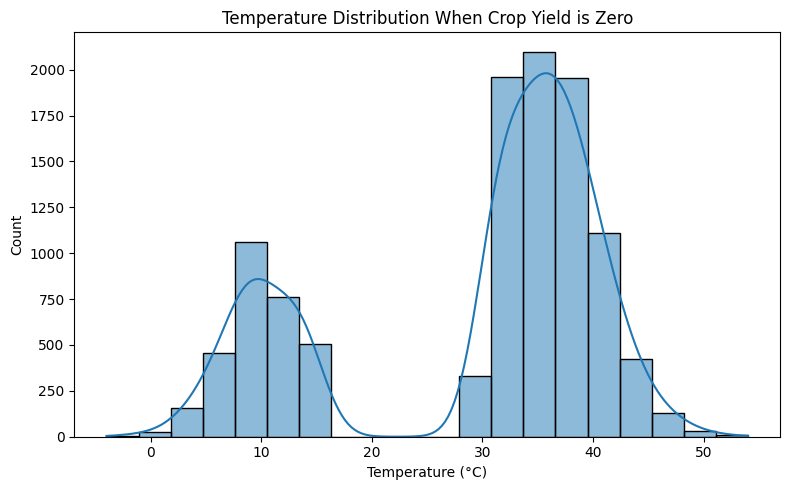

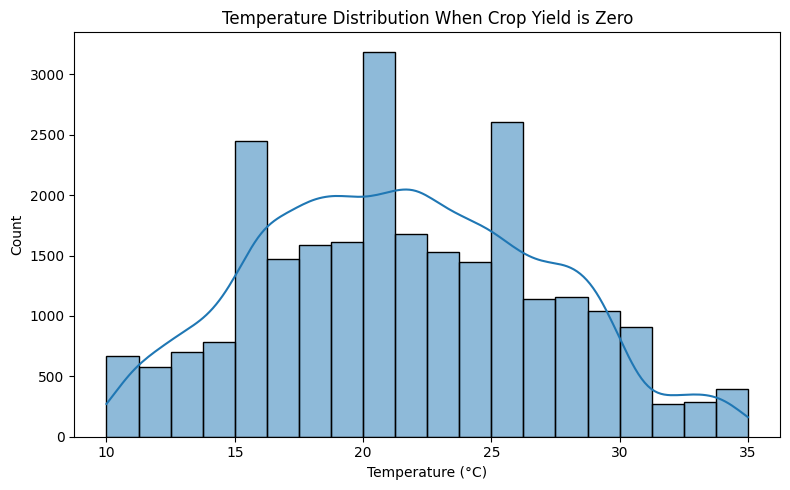

In [10]:
# Filter rows where Crop_Yield is 0
zero_yield = df[df['Crop_Yield'] == 0]

plt.figure(figsize=(8, 5))
sns.histplot(zero_yield['Temperature'], bins=20, kde=True)
plt.title("Temperature Distribution When Crop Yield is Zero")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Filter rows where Crop_Yield is 0
zero_yield = df[df['Crop_Yield'] != 0]

plt.figure(figsize=(8, 5))
sns.histplot(zero_yield['Temperature'], bins=20, kde=True)
plt.title("Temperature Distribution When Crop Yield is Zero")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [11]:
# Define custom bins (in °C)
bins = [-10, 0, 10, 20, 30, 55]  # 예: 0~10, 10~20, 20~30, 30~40
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Create a new column 'Temp_Category' based on the bins
df['Temp_Category'] = pd.cut(df['Temperature'], bins=bins, labels=labels, include_lowest=True)

print(df[['Temperature', 'Temp_Category']].head())

   Temperature Temp_Category
0            9           Low
1           20        Medium
2           12        Medium
3           20        Medium
4           16        Medium


C:\Users\james\AppData\Local\Temp\ipykernel_30584\2169405901.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Temp_Category')['Crop_Yield'].mean().reset_index()
C:\Users\james\AppData\Local\Temp\ipykernel_30584\2169405901.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='Temp_Category', y='Crop_Yield', palette='viridis')


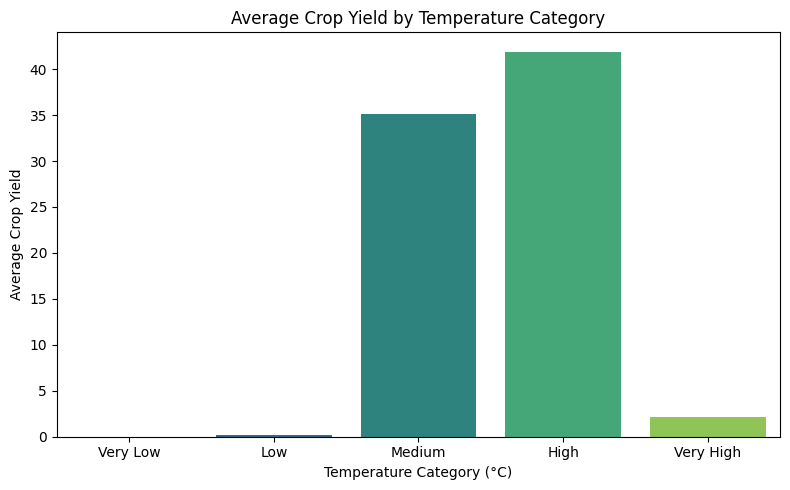

In [42]:
# Calculate mean Crop_Yield per temperature category
grouped = df.groupby('Temp_Category')['Crop_Yield'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='Temp_Category', y='Crop_Yield', palette='viridis')

plt.title("Average Crop Yield by Temperature Category")
plt.xlabel("Temperature Category (°C)")
plt.ylabel("Average Crop Yield")
plt.tight_layout()
plt.show()

1. Very Low / Low categories
- Crop yield is nearly zero → extremely low temperatures make growth impossible or severely restricted.
2. Medium category
- Average yield rises significantly (≈34) → crops begin to grow effectively within this range.
3. High category
- The highest yield is recorded (≈41) → this represents the optimal temperature range for crop growth and maximum productivity.
4. Very High category
- Yield drops sharply (≈2) → excessive heat leads to physiological stress and reduced productivity.

In [12]:
# Temperature
# Group by Crop_Type and calculate mean Temperature and Crop_Yield
grouped = df.groupby('Crop_Type')[['Temperature', 'Crop_Yield']].mean().reset_index()
print(grouped)

   Crop_Type  Temperature  Crop_Yield
0     Barley    23.815444   25.552846
1       Corn    23.754655   28.330560
2     Cotton    23.763691   29.208710
3     Potato    23.943319   26.213347
4       Rice    23.776013   28.688229
5    Soybean    23.765882   25.932047
6  Sugarcane    23.812705   28.694864
7  Sunflower    23.816539   27.498513
8     Tomato    23.901424   22.794184
9      Wheat    23.765608   25.871497


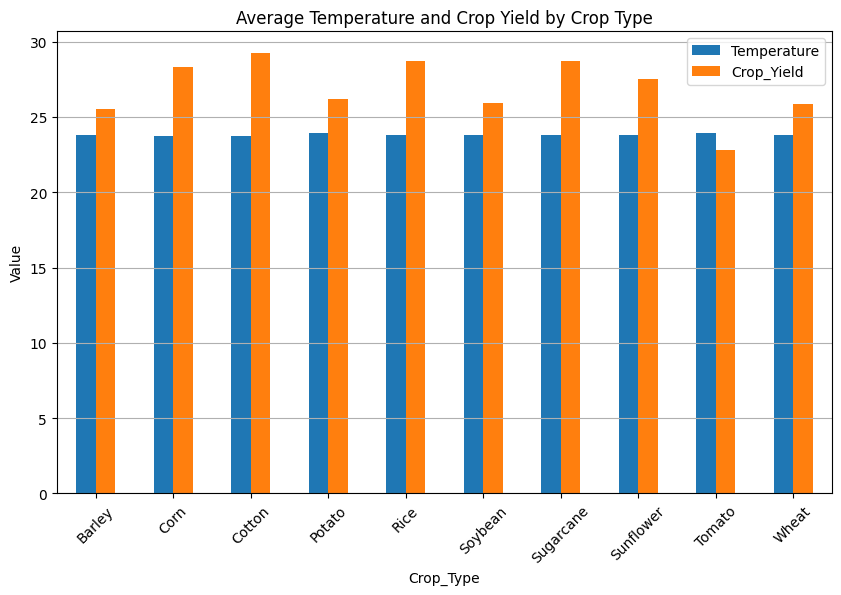

In [13]:
# Bar plot for average Temperature and Crop_Yield
grouped.plot(x='Crop_Type', y=['Temperature', 'Crop_Yield'], kind='bar', figsize=(10,6))
plt.title("Average Temperature and Crop Yield by Crop Type")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Insights from the graph

1. Overall trend
- The average temperature is fairly consistent across all crops, around 23–24℃.
- However, average crop yield varies by crop type, suggesting that temperature alone is not the sole determinant of productivity.
2. High-yield crops
- Cotton, Rice, Soybean, and Sugarcane show the highest average yields (28–29).

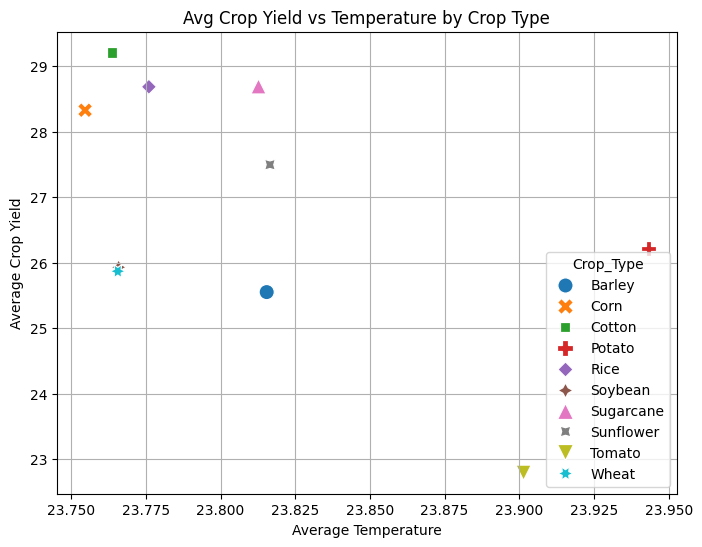

In [14]:
# Set figure size
plt.figure(figsize=(8,6))

# Scatter plot with different colors and markers by Crop_Type
sns.scatterplot(
    data=grouped,
    x='Temperature',
    y='Crop_Yield',
    hue='Crop_Type',      # Different colors by crop
    style='Crop_Type',    # Different marker shapes by crop
    s=120                 # Marker size
)

# Add chart title and labels
plt.title("Avg Crop Yield vs Temperature by Crop Type")
plt.xlabel("Average Temperature")
plt.ylabel("Average Crop Yield")

# Add grid
plt.grid(True)

# Show plot
plt.show()

### Insights from the graph
1. Temperature distribution
- All crops fall within a narrow range of 23.75℃ to 23.95℃, meaning temperature differences are minimal.
- Therefore, temperature alone cannot explain the variation in crop yields.

In [15]:
# Temp_Category
# Group by Crop_Type and Temp_Category, then calculate mean Crop_Yield
grouped = df.groupby(['Crop_Type', 'Temp_Category'])['Crop_Yield'].mean().reset_index()
print(grouped.head())

  Crop_Type Temp_Category  Crop_Yield
0    Barley      Very Low    0.000000
1    Barley           Low    0.256694
2    Barley        Medium   40.367406
3    Barley          High   33.363466
4    Barley     Very High    0.000000


C:\Users\james\AppData\Local\Temp\ipykernel_29612\2673329816.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Crop_Type', 'Temp_Category'])['Crop_Yield'].mean().reset_index()


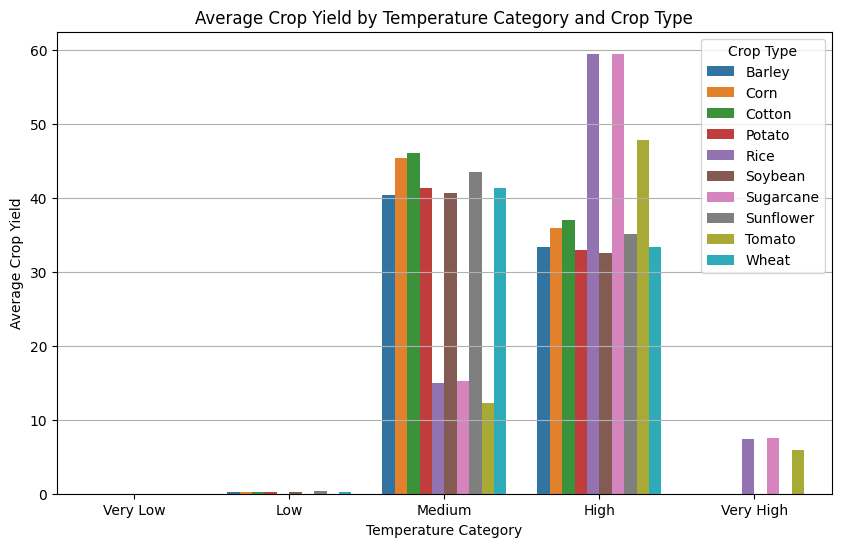

In [16]:
# Set the figure size for better readability
plt.figure(figsize=(10,6))

# Create a bar plot
# x-axis: Temperature Category (Low, Medium, High, etc.)
# y-axis: Average Crop Yield
# hue: Different colors for each Crop_Type
sns.barplot(
    data=grouped,
    x='Temp_Category',
    y='Crop_Yield',
    hue='Crop_Type'
)

# Add title to the chart
plt.title("Average Crop Yield by Temperature Category and Crop Type")
plt.xlabel("Temperature Category")
plt.ylabel("Average Crop Yield")
plt.legend(title='Crop Type')
plt.grid(axis='y')
plt.show()

### Insights from the graph
1. Very Low / Low categories
- All crops show yields close to zero.
- This confirms that extremely low temperatures make crop growth nearly impossible.
2. Medium category
- Most crops produce stable yields (around 40).
- Cotton, Corn, Sunflower, Potato, and Wheat record relatively higher yields (40–46).
- However, Rice, Sugarcane, and Tomato perform poorly in this range (≈15–25), indicating lower productivity under medium temperatures.
3. High category
- Overall yields increase further.
- Rice and Sugarcane reach the highest average yields (≈60), showing strong adaptation to warmer conditions.
- Tomato also performs much better in the High category (≈48) compared to Medium.
- Conversely, Barley and Wheat remain relatively low (≈33–34), even under higher temperatures.
4. Very High category
- Most crops lose productivity almost entirely.
- Only Rice, Sugarcane, and Tomato maintain some yield, suggesting they are more heat-tolerant crops.

### Insights from the graph
1. Distribution shape
- The data follows a roughly bell-shaped distribution, close to normal.
- A slight right-skew is observed, with a longer tail toward higher temperatures.
2. Main range
- The highest frequency occurs between 15℃ and 25℃, with about 4,000–5,000 observations in this interval.
- Values below 0℃ and above 40℃ are rare, representing extreme climate conditions.

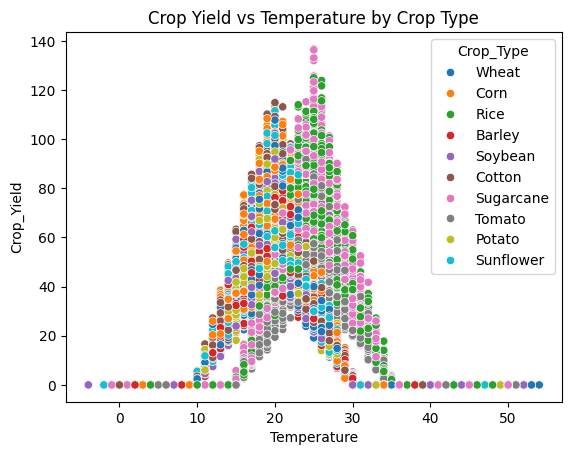

In [17]:
# Bivariate Analysis (Relationship between two variables)
# Scatter plot: Temperature vs Crop Yield by Crop Type
sns.scatterplot(data=df, x='Temperature', y='Crop_Yield', hue='Crop_Type')
plt.title("Crop Yield vs Temperature by Crop Type")
plt.show()

### Insights from the graph
1. Crop-specific trends
- Wheat, Corn, Rice, Soybean, and Cotton achieve high yields in the 20–25℃ range.
- Tomato, Potato, and Sunflower also concentrate their productivity within this interval.
- Sugarcane and Rice maintain relatively high yields even in warmer conditions (25–30℃), showing greater heat tolerance.

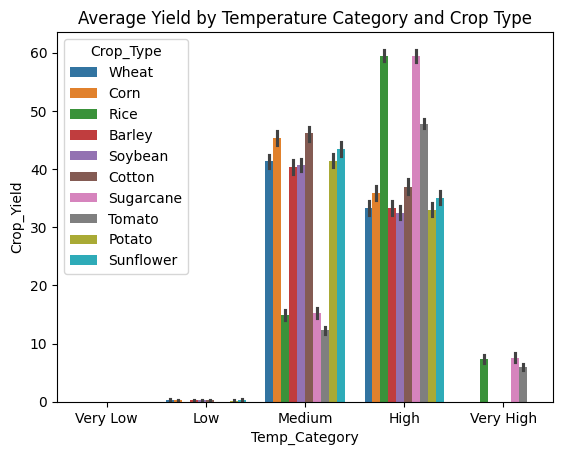

In [18]:
# Bar plot: Average Yield by Temperature Category and Crop Type
sns.barplot(data=df, x='Temp_Category', y='Crop_Yield', hue='Crop_Type')
plt.title("Average Yield by Temperature Category and Crop Type")
plt.show()

### Insights from the graph
1. Very Low / Low categories
- All crops show yields close to zero.
- Extremely low temperatures make growth nearly impossible.
2. Medium category
- Most crops achieve stable yields around 40–45.
- Corn, Wheat, Sunflower, and Cotton perform relatively well in this range.
- In contrast, Rice, Sugarcane, and Tomato record lower yields, suggesting they are better suited for warmer 3. 3. conditions.
3. High category
- Overall yields increase further.
- Rice and Sugarcane stand out, reaching yields of about 60, indicating strong heat tolerance.
- Tomato also shows significant improvement (≈48) in this range.
- Barley and Wheat, however, remain at relatively lower yield levels.
4. Very High category
- Most crops experience a sharp decline in yield.
- Rice and Sugarcane still maintain some productivity, showing partial adaptation to extreme heat.

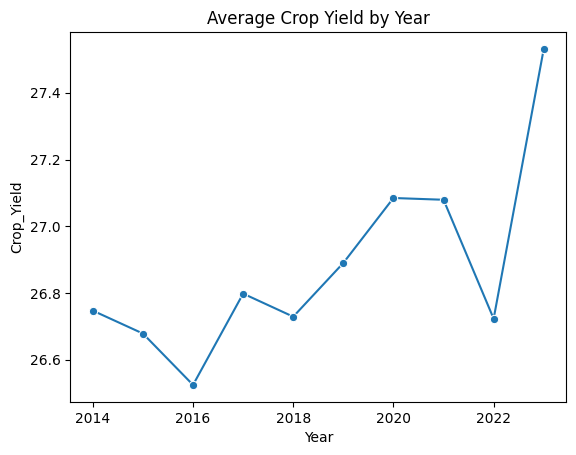

In [19]:
# Time-series Analysis
# Average yearly yield
yearly_yield = df.groupby('Year')['Crop_Yield'].mean().reset_index()
sns.lineplot(data=yearly_yield, x='Year', y='Crop_Yield', marker='o')
plt.title("Average Crop Yield by Year")
plt.show()




### Insights from the graph
1. Overall Trend
- From 2014 to 2023, crop yield shows a gradual upward trend.
- However, the increase is not steep, reflecting relatively moderate changes.
2. Decline Period
- After 2014, there was a slight downward movement, with 2016 recording the lowest average yield (≈26.55).

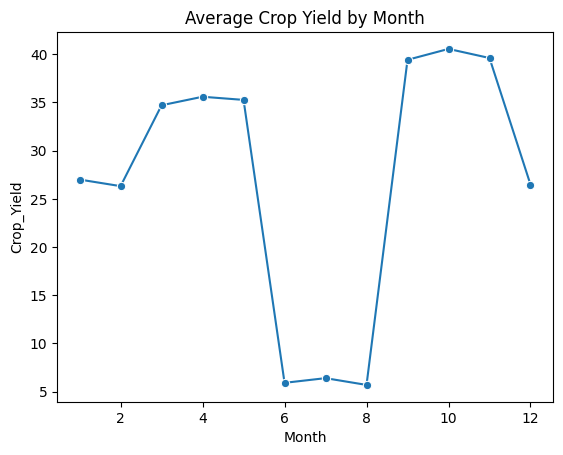

In [20]:
# Average monthly yield
monthly_yield = df.groupby('Month')['Crop_Yield'].mean().reset_index()
sns.lineplot(data=monthly_yield, x='Month', y='Crop_Yield', marker='o')
plt.title("Average Crop Yield by Month")
plt.show()

### Insights from the graph
1. Early months (January–February)
- Yield remains moderate at around 26–27.
- Stable but not at peak levels.
2. Spring (March–May)
- Clear upward trend, with yields rising to above 35 in April and May.
- Reflects strong crop growth during this season.
3. Summer (June–August)
- Sharp decline, with yields dropping to the lowest point (≈6).
- Likely due to heat stress, water shortage, or other summer-related climate constraints.
4. Autumn (September–November)
- Yields rise again, reaching the highest point in October (≈40+).
- This is the most productive and stable period of the year.
5. December
- Yield falls back to around 27, returning to a moderate level similar to early months.

### Insights from the graph
1. Humidity shows the strongest positive relationship with crop yield, highlighting the importance of water management for agricultural productivity.
2. Temperature has a slight negative impact on yield, suggesting that extreme heat could reduce crop performance.
3. Wind speed does not appear to play a meaningful role in yield outcomes in this dataset.

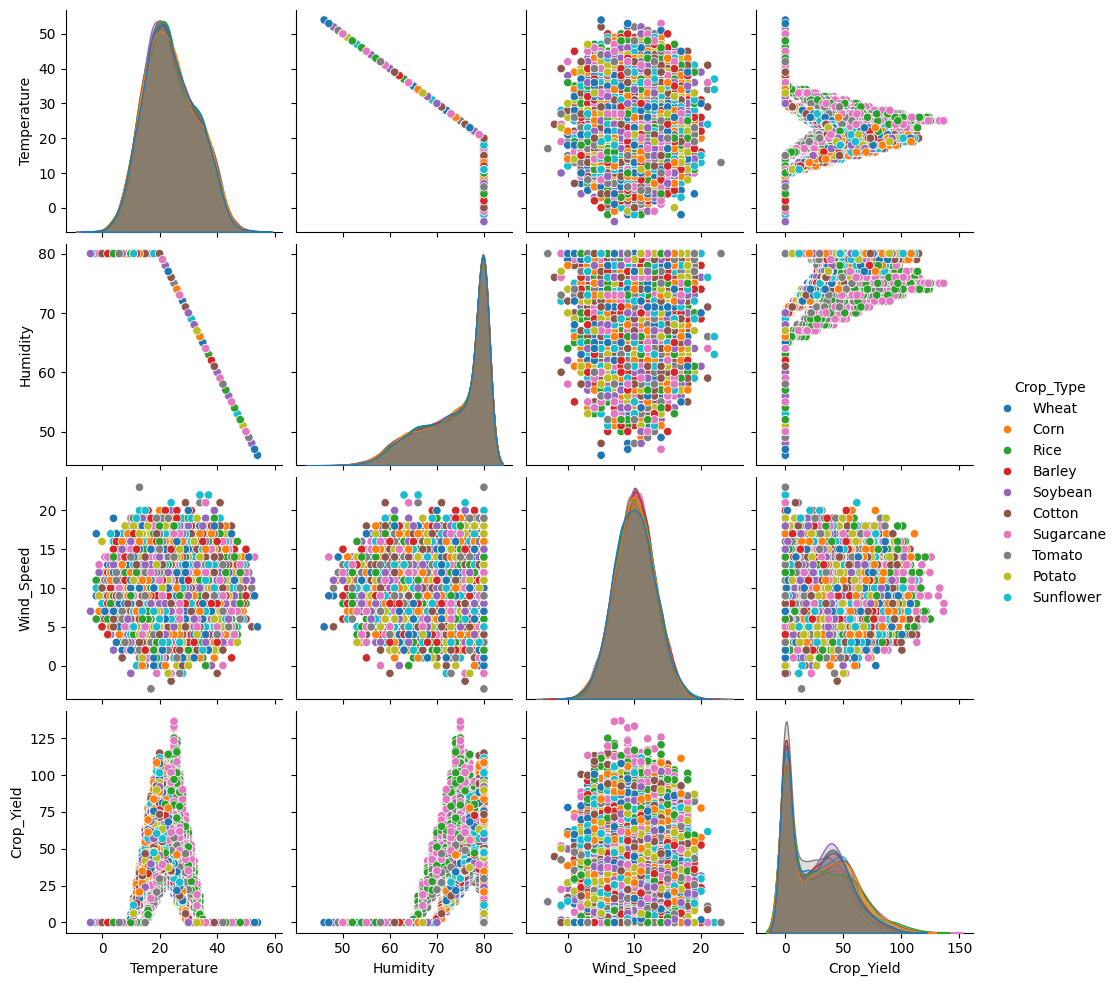

In [21]:
# Multivariate Analysis (Extra)
# Pair plot to visualize multiple relationships at once
sns.pairplot(df[['Temperature','Humidity','Wind_Speed','Crop_Yield','Crop_Type']], hue='Crop_Type')
plt.show()

### Insights from the graph
1. Temperature distribution
- Follows a bell-shaped curve, concentrated around 20℃.
- No significant differences across crop types.
2. Humidity distribution
- Mostly concentrated between 50–80.
- Shows a strong negative relationship with Temperature → higher temperatures correspond to lower humidity.
3. Wind_Speed distribution
- Spread fairly evenly between 0–20.
- Shows no strong correlation with other variables.
4. Crop_Yield distribution
- Most values fall within 0–50, with a smaller number extending beyond 100.
- Shows curved relationships with Temperature and Humidity → yields peak under specific optimal conditions.
5. Variable correlations
- Temperature, Humidity: clear negative linear relationship.
- Humidity, Crop_Yield: positive correlation (higher humidity tends to increase yield).
- Temperature, Crop_Yield: negative correlation (higher temperatures reduce yield).
- Wind_Speed: largely independent, with minimal impact on yield.
6. Crop-type differences
- General patterns are consistent across all crop types.
- Crops like Sugarcane and Rice maintain relatively high yields under high-humidity conditions.
- Wheat and Barley show sharper yield declines under high temperatures.

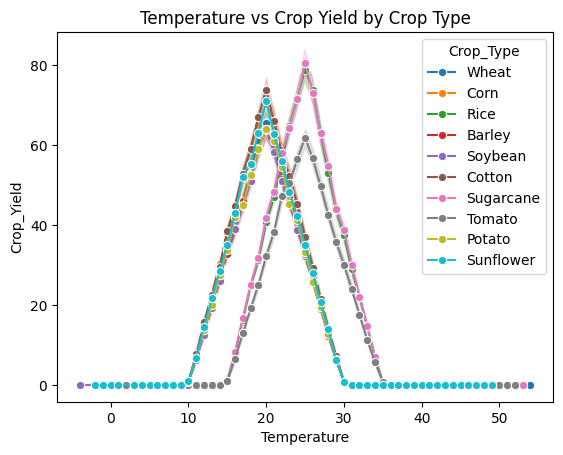

In [22]:
# Line plot of Temperature vs Crop_Yield by Crop_Type
# Purpose:
#   - Show how Crop_Yield changes with Temperature
#   - Use hue="Crop_Type" to compare different crops on the same plot
#   - Marker 'o' highlights individual data points along the line
sns.lineplot(data=df, x='Temperature', y='Crop_Yield', hue='Crop_Type', marker='o')
plt.title("Temperature vs Crop Yield by Crop Type")
plt.show()

### Insights from the graph
1. Optimal growing temperature: generally within 20–25°C.
2. High-temperature resilient crops: Sugarcane, Sunflower → candidates for hot climates.
3. Yield failure is highly likely outside the 10–35°C range.
4. For machine learning models, Temperature should be modeled as a non-linear feature (e.g., polynomial terms, binning).

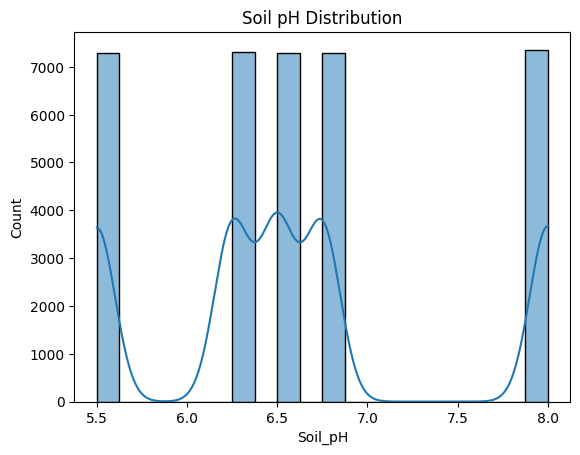

In [23]:
# Data Distribution
# Visualizes the distribution of soil pH values
# Soil pH distribution 
sns.histplot(df['Soil_pH'], kde=True, bins=20)
plt.title("Soil pH Distribution")
plt.show()

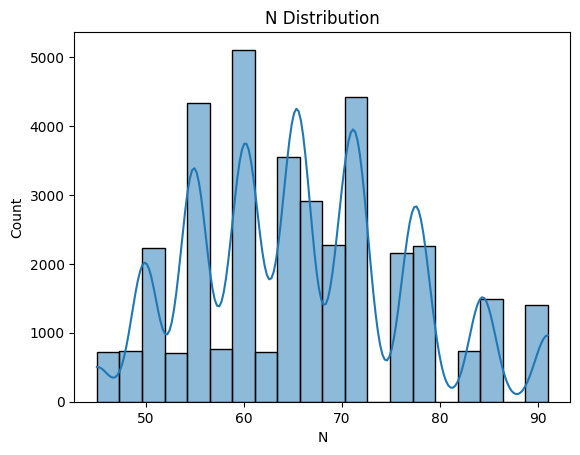

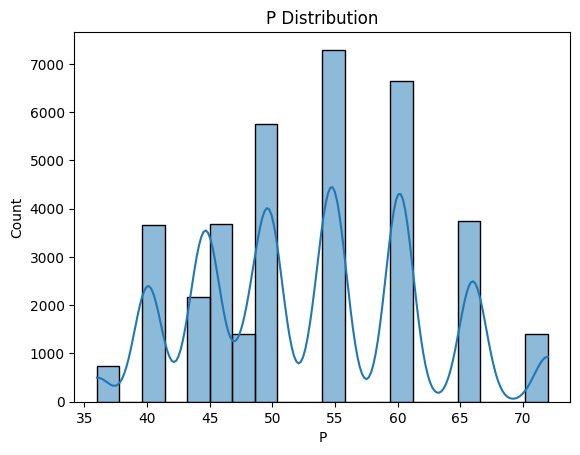

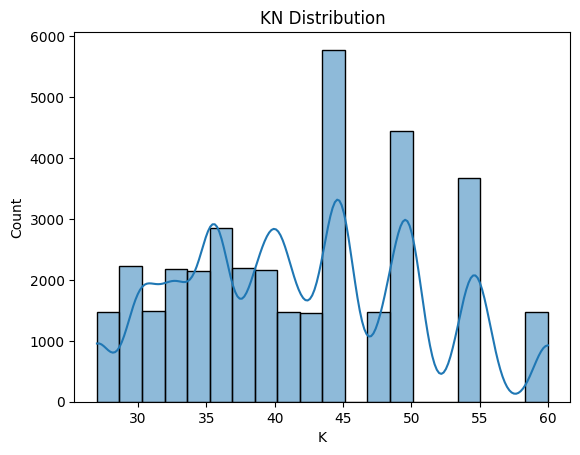

In [24]:
# Data Distribution
# Visualizes the distribution of soil pH values
# Nitrogen distribution 
sns.histplot(df['N'], kde=True, bins=20)
plt.title("N Distribution")
plt.show()

# P (Phosphorus) distribution
sns.histplot(df['P'], kde=True, bins=20)
plt.title("P Distribution")
plt.show()

# K (Potassium) distribution
sns.histplot(df['K'], kde=True, bins=20)
plt.title("KN Distribution")
plt.show()

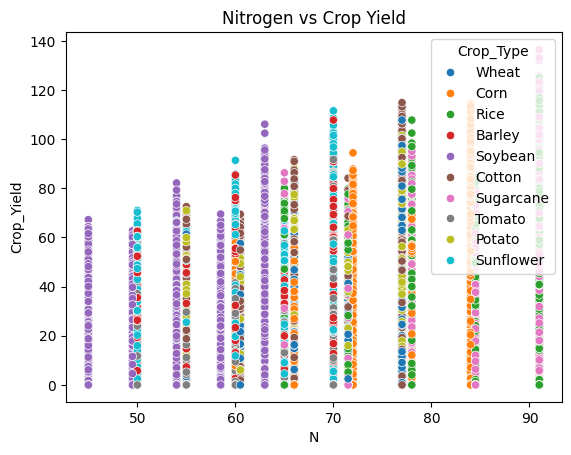

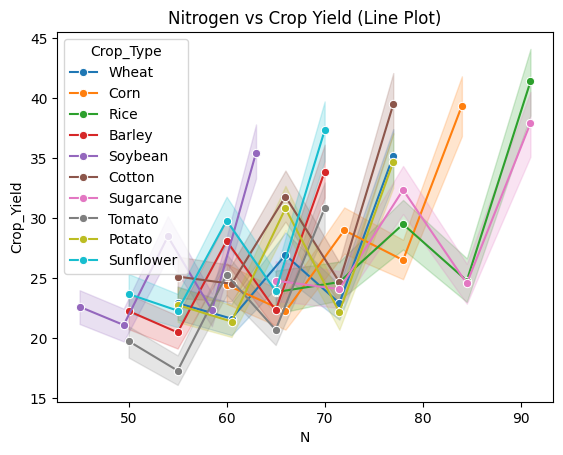

In [25]:
#Soil Nutrients Effect
# N (Nitrogen) vs Crop Yield
sns.scatterplot(data=df, x='N', y='Crop_Yield', hue='Crop_Type')
plt.title("Nitrogen vs Crop Yield")
plt.show()

# Group by N (optional: bin N into ranges) and plot mean Crop_Yield per Crop_Type
sns.lineplot(data=df, x='N', y='Crop_Yield', hue='Crop_Type', marker='o')
plt.title("Nitrogen vs Crop Yield (Line Plot)")
plt.show()

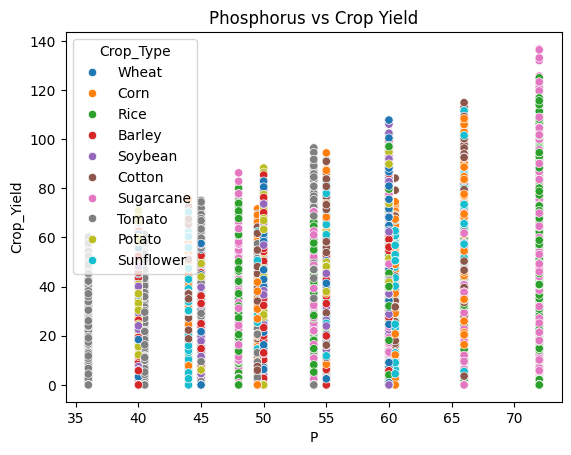

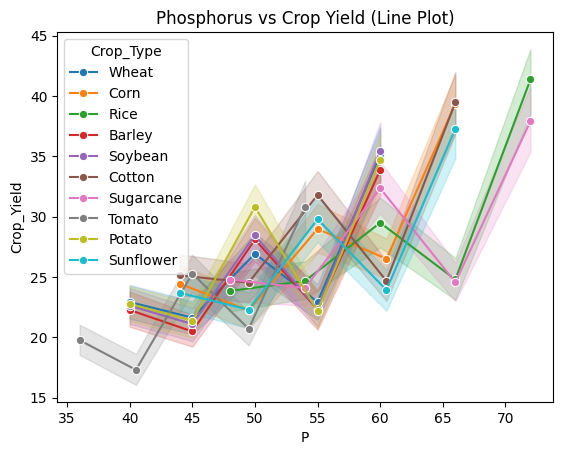

In [26]:
# Soil Nutrients Effect
# P (Phosphorus) vs Crop Yield
sns.scatterplot(data=df, x='P', y='Crop_Yield', hue='Crop_Type')
plt.title("Phosphorus vs Crop Yield")
plt.show()

# Group by N (optional: bin P into ranges) and plot mean Crop_Yield per Crop_Type
sns.lineplot(data=df, x='P', y='Crop_Yield', hue='Crop_Type', marker='o')
plt.title("Phosphorus vs Crop Yield (Line Plot)")
plt.show()

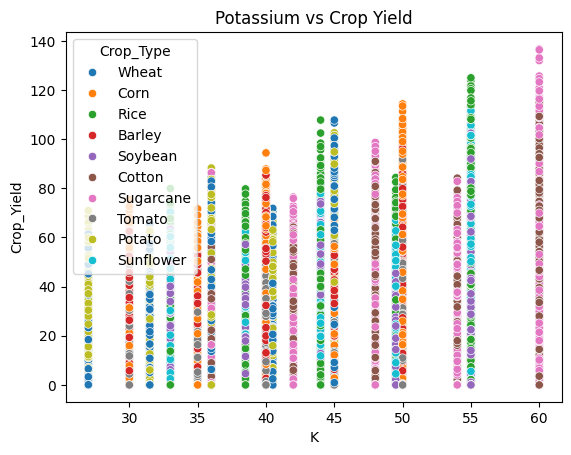

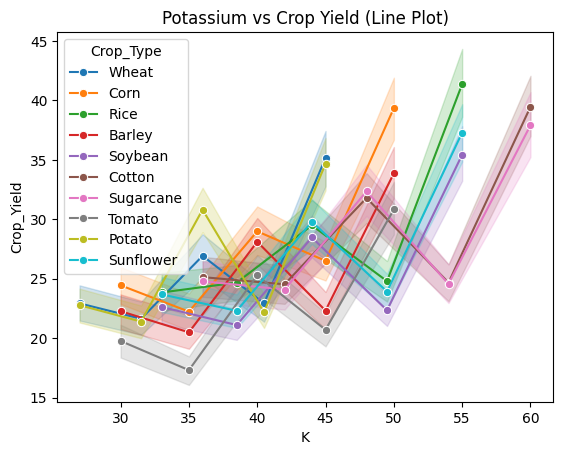

In [27]:
#Soil Nutrients Effect
# K (Potassium) vs Crop Yield
sns.scatterplot(data=df, x='K', y='Crop_Yield', hue='Crop_Type')
plt.title("Potassium vs Crop Yield")
plt.show()

# Group by N (optional: bin P into ranges) and plot mean Crop_Yield per Crop_Type
sns.lineplot(data=df, x='K', y='Crop_Yield', hue='Crop_Type', marker='o')
plt.title("Potassium vs Crop Yield (Line Plot)")
plt.show()

In [28]:
# Soil_Quality analysis in progress
# Group by Soil_Quality and calculate mean Crop_Yield
mean_yield = df.groupby('Soil_Quality')['Crop_Yield'].mean().reset_index()
print(mean_yield)

    Soil_Quality  Crop_Yield
0             13   20.706134
1             14   22.436816
2             15   25.242570
3             16   24.672766
4             17   24.675347
5             22   19.661644
6             23   21.511164
7             24   22.299317
8             25   23.374245
9             27   24.674342
10            28   24.088898
11            34   21.175305
12            35   22.268281
13            36   22.849836
14            37   23.683389
15            39   24.784098
16            42   25.281782
17            43   25.700095
18            44   28.616801
19            46   29.796100
20            49   30.402851
21            53   29.492750
22            54   32.349141
23            58   30.828166
24            59   35.438641
25            60   33.871991
26            61   34.923008
27            64   37.297425
28            67   39.352502
29            68   39.463590
30            73   41.371962
31            74   37.914171


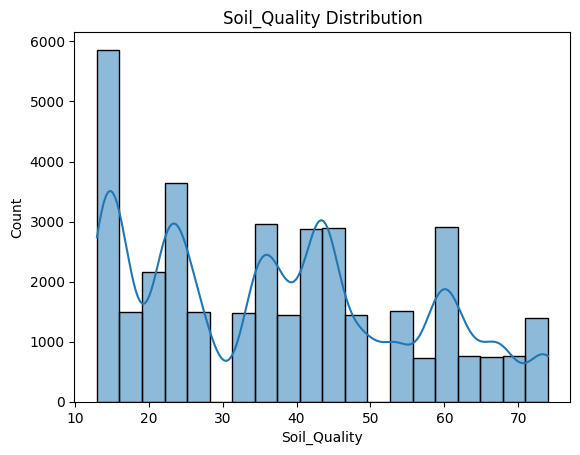

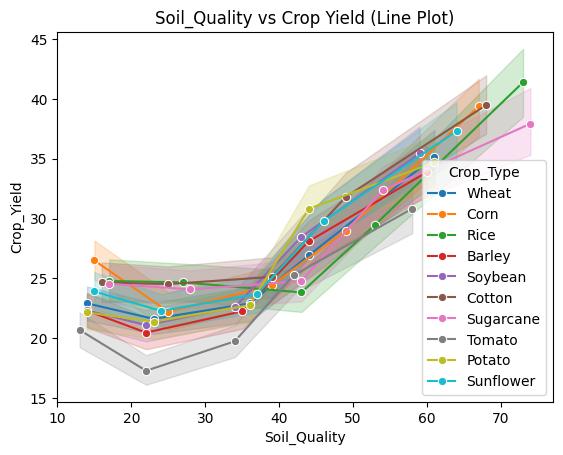

In [29]:
# Soil_Quality distribution 
sns.histplot(df['Soil_Quality'], kde=True, bins=20)
plt.title("Soil_Quality Distribution")
plt.show()

# Plot the relationship between Soil_Quality and Crop_Yield for each Crop_Type
sns.lineplot(data=df, x='Soil_Quality', y='Crop_Yield', hue='Crop_Type', marker='o')
plt.title("Soil_Quality vs Crop Yield (Line Plot)")
plt.show()

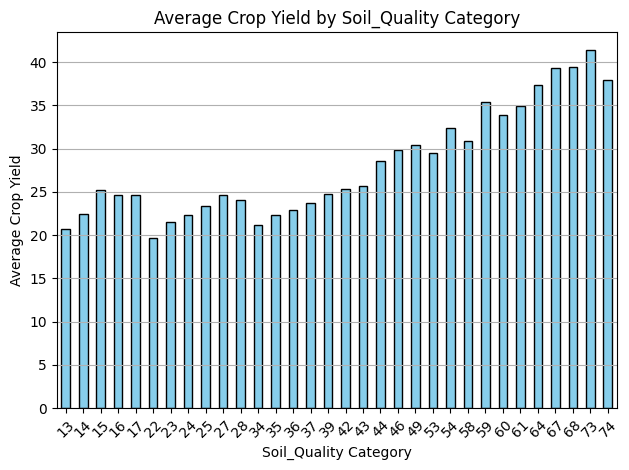

In [30]:
# Group by temperature category and calculate mean yield
mean_yield = df.groupby('Soil_Quality')['Crop_Yield'].mean()

# Plot bar chart
mean_yield.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Crop Yield by Soil_Quality Category')
plt.ylabel('Average Crop Yield')
plt.xlabel('Soil_Quality Category')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

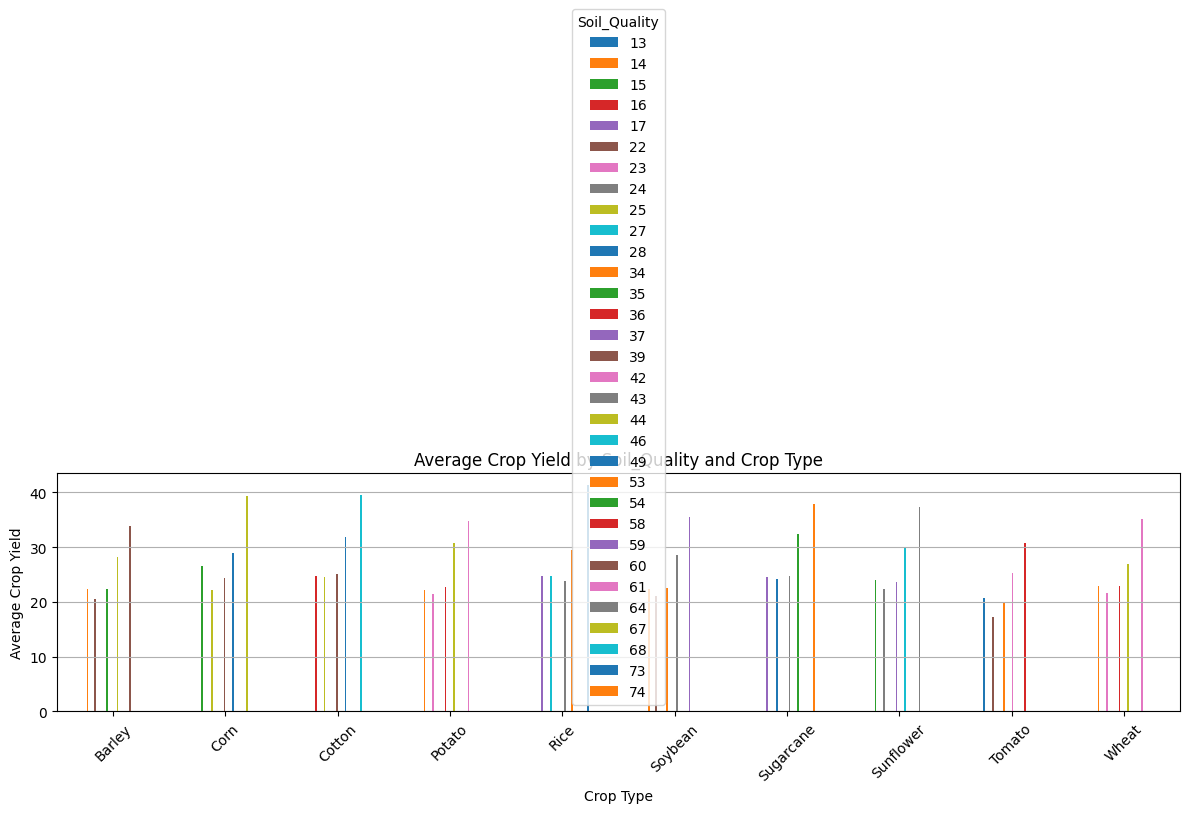

In [31]:
# Group by Crop_Type and Temp_Category, calculate mean Crop_Yield
grouped = df.groupby(['Crop_Type', 'Soil_Quality'])['Crop_Yield'].mean().unstack()

# Plot grouped bar chart
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Average Crop Yield by Soil_Quality and Crop Type')
plt.ylabel('Average Crop Yield')
plt.xlabel('Crop Type')
plt.xticks(rotation=45)
plt.legend(title='Soil_Quality')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [32]:
# Bin Soil_Quality into categories (Low, Medium, High)
#bins = [0, 30, 60, 100]  # 0-30 = Low, 30-60 = Medium, 60-100 = High
#labels = ['Low', 'Medium', 'High']

bins = [ 20, 40, 50, 60, 70, 80] # 0~10, 10~20, 20~30, 30~40
labels = ['Very Low Quality', 'Low Quality', 'Medium Quality', 'High Quality', 'Very High Quality']

df['Soil_Quality_Category'] = pd.cut(df['Soil_Quality'], 
                                              bins=bins, labels=labels, include_lowest=True)
print(df.groupby('Soil_Quality_Category')['Crop_Yield'].mean())

Soil_Quality_Category
Very Low Quality     22.413038
Low Quality          27.885021
Medium Quality       32.387883
High Quality         37.246487
Very High Quality    39.610959
Name: Crop_Yield, dtype: float64


C:\Users\james\AppData\Local\Temp\ipykernel_29612\4223697719.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Soil_Quality_Category')['Crop_Yield'].mean())


C:\Users\james\AppData\Local\Temp\ipykernel_29612\2942938848.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Crop_Type', 'Soil_Quality_Category'])['Crop_Yield'].mean().unstack()


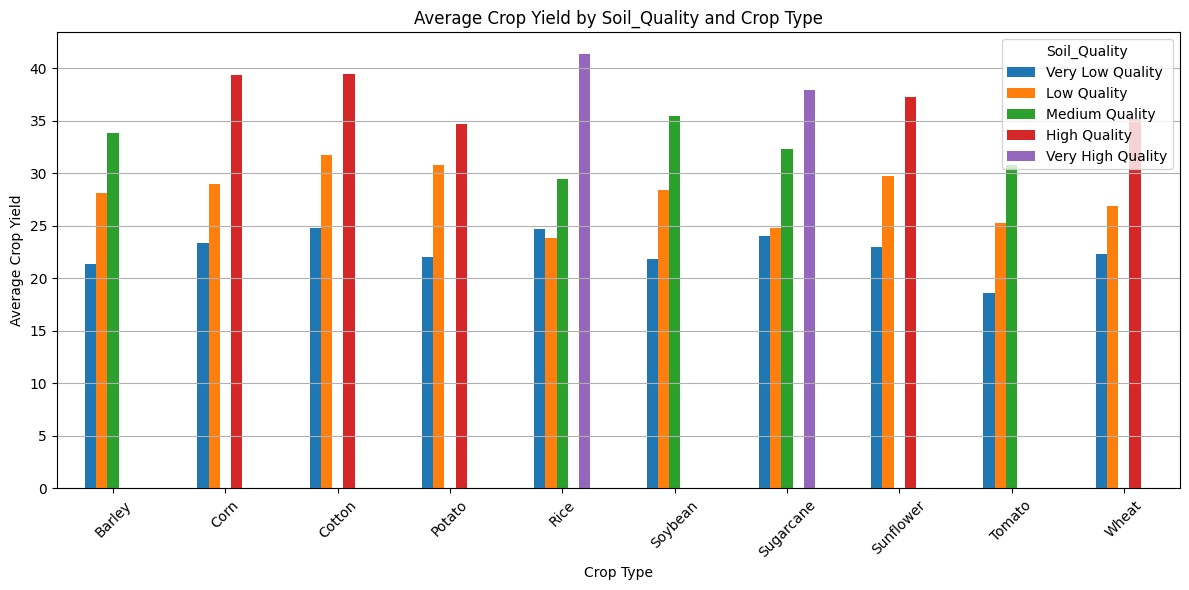

In [33]:
# Group by Crop_Type and Temp_Category, calculate mean Crop_Yield
grouped = df.groupby(['Crop_Type', 'Soil_Quality_Category'])['Crop_Yield'].mean().unstack()

# Plot grouped bar chart
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Average Crop Yield by Soil_Quality and Crop Type')
plt.ylabel('Average Crop Yield')
plt.xlabel('Crop Type')
plt.xticks(rotation=45)
plt.legend(title='Soil_Quality')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

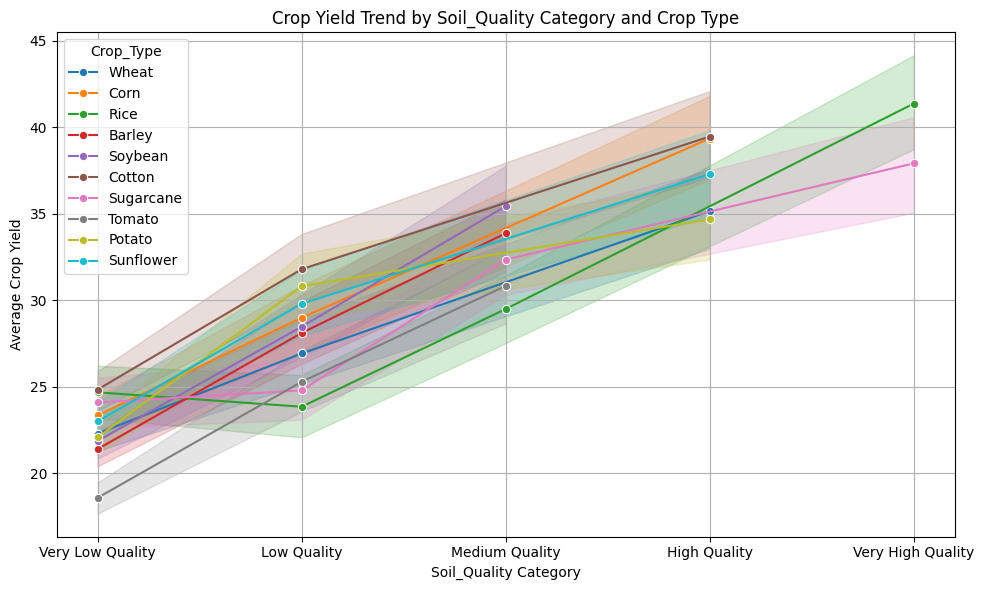

In [34]:
plt.figure(figsize=(10, 6))
# Seaborn lineplot: Crop_Yield by Crop_Type and Temp_Category
sns.lineplot(data=df, x='Soil_Quality_Category', y='Crop_Yield', hue='Crop_Type', marker='o')

plt.title('Crop Yield Trend by Soil_Quality Category and Crop Type')
plt.xlabel('Soil_Quality Category')
plt.ylabel('Average Crop Yield')
plt.grid(True)
plt.tight_layout()
plt.show()

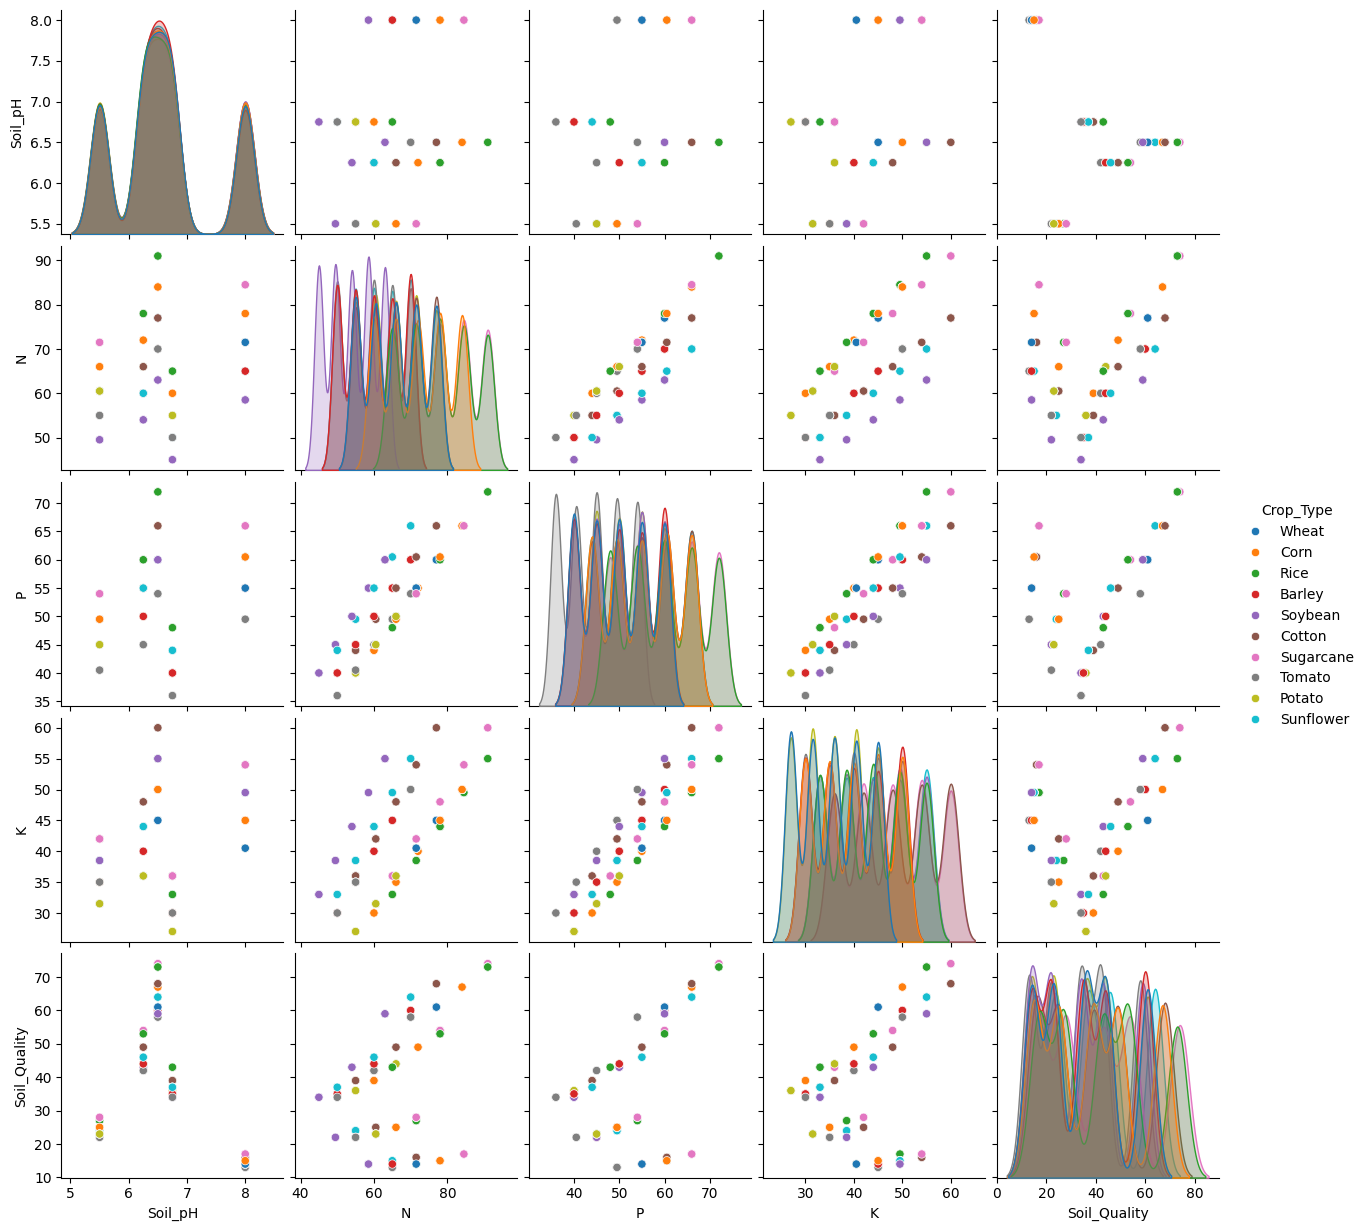

In [35]:
# Multivariate Analysis (Extra)
# Pair plot to visualize multiple relationships at once
sns.pairplot(df[['Soil_pH','N','P','K','Soil_Quality','Crop_Type']], hue='Crop_Type')
plt.show()

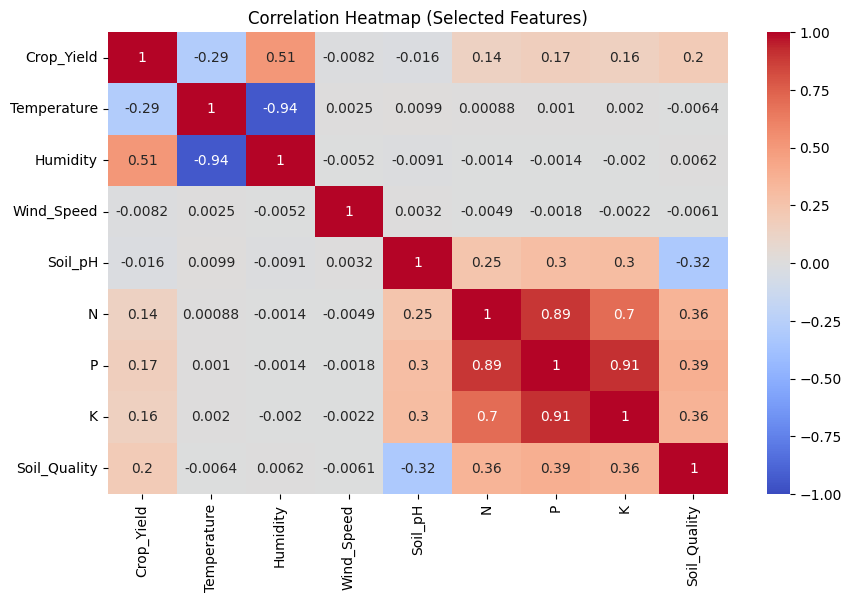

In [36]:
# Relationship Analysis with selected fields
# Define the list of fields to include in the correlation heatmap
selected_fields = ['Crop_Yield','Temperature','Humidity','Wind_Speed','Soil_pH','N','P','K','Soil_Quality']

# Filter only the selected numeric fields
numeric_df = df[selected_fields]

# Generate the correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Selected Features)")
plt.show()



In [38]:
print(df['Soil_pH'].describe())
print(df['Soil_pH'].min(), df['Soil_pH'].max())
print(df['pH_bin'].value_counts(dropna=False))

count    36520.000000
mean         6.602731
std          0.816973
min          5.500000
25%          6.250000
50%          6.500000
75%          6.750000
max          8.000000
Name: Soil_pH, dtype: float64
5.5 8.0


KeyError: 'pH_bin'

C:\Users\james\AppData\Local\Temp\ipykernel_29612\3434527548.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['pH_bin', 'Crop_Type'])['Crop_Yield'].mean().reset_index()


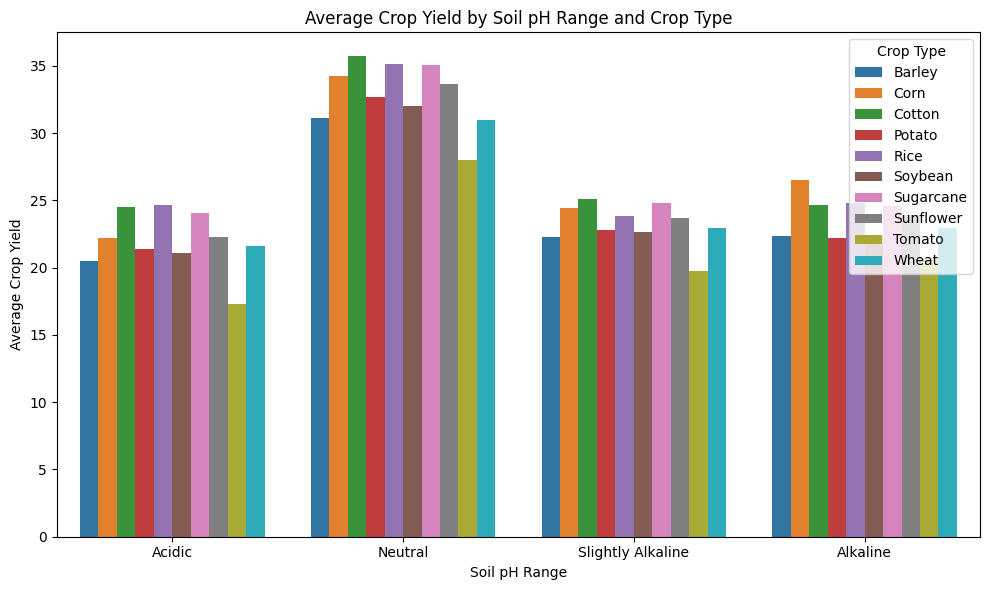

In [39]:
# Bin Soil_pH into categorical ranges
df['pH_bin'] = pd.cut(df['Soil_pH'], bins=[0, 5.5, 6.5, 7.5, 8],
                      labels=['Acidic', 'Neutral', 'Slightly Alkaline', 'Alkaline'])

# Group by Crop_Type and pH range
grouped = df.groupby(['pH_bin', 'Crop_Type'])['Crop_Yield'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='pH_bin', y='Crop_Yield', hue='Crop_Type')
plt.title("Average Crop Yield by Soil pH Range and Crop Type")
plt.xlabel("Soil pH Range")
plt.ylabel("Average Crop Yield")
plt.legend(title='Crop Type')
plt.tight_layout()
plt.show()

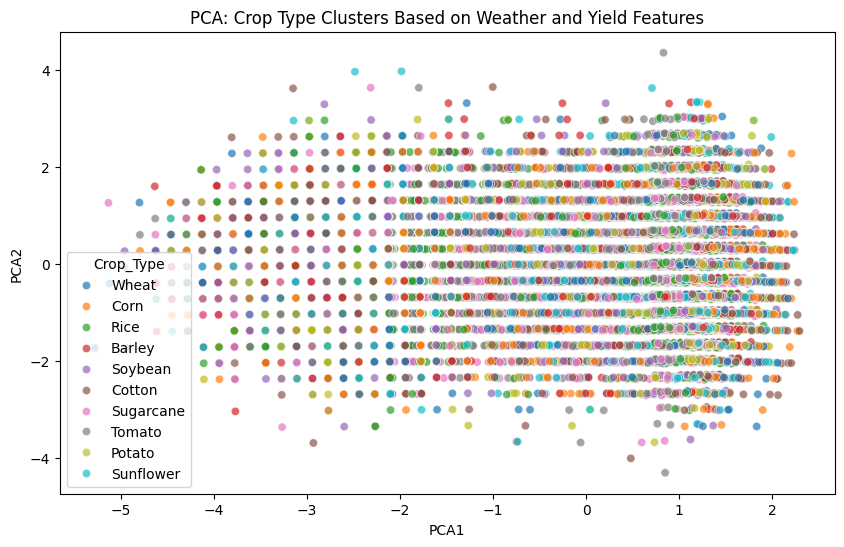

Explained variance ratio: [0.55228155 0.250015  ]


In [40]:
# PCA
# Select only numeric features
X = df[['Temperature','Humidity','Wind_Speed','Crop_Yield']]

# Standardize features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results back to dataframe
df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

# Plot PCA results colored by Crop_Type
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Crop_Type', alpha=0.7)
plt.title("PCA: Crop Type Clusters Based on Weather and Yield Features")
plt.show()

# Explained variance ratio (to see how much information is preserved)
print("Explained variance ratio:", pca.explained_variance_ratio_)

### Insights from the graph
1. Axes (PCA1 and PCA2)
- PCA1 (x-axis) and PCA2 (y-axis) are the first two principal components.
- They are linear combinations of the original features (Temperature, Humidity, Wind_Speed, Soil_Quality, Crop_Yield, etc.).
- These axes capture the maximum variance in the dataset, allowing us to project high-dimensional data into 2D space.
2. Clusters by Crop Type
- Each dot represents one observation (sample).
- Colors represent different crop types (Wheat, Corn, Rice, etc.).
- Ideally, crops with similar growing conditions and yield patterns would form distinct clusters.
3. Observed Patterns
- The scatter looks heavily overlapping, meaning many crop types share similar weather and soil conditions.
- Some slight separation is visible:
- Sugarcane and Sunflower dots are a bit spread out toward certain PCA1/PCA2 ranges → possibly reflecting unique tolerance to temperature/humidity.
- Wheat, Barley, Rice appear close together → they may have similar soil and climate requirements.
- But overall, clusters are not well-separated, which implies that environmental variables alone may not fully distinguish crops.
4. Implications for Modeling
- Since PCA shows overlap, a simple linear model may struggle to classify crops based only on these features.
- More complex, non-linear models (RandomForest, Gradient Boosting, Neural Networks) could capture subtler interactions.
- Additional features (e.g., rainfall, soil nutrients, geographic region) may improve cluster separation.

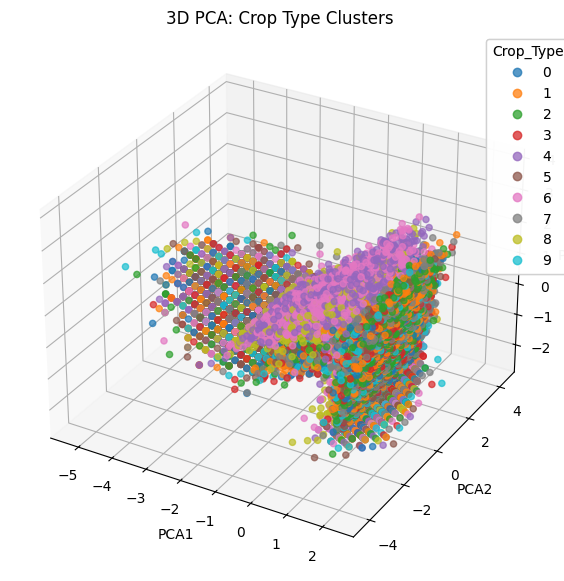

Explained variance ratio: [0.55228155 0.250015   0.19096161]


In [41]:
# Select numeric features
X = df[['Temperature','Humidity','Wind_Speed','Crop_Yield']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 3 components for 3D visualization)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results back to dataframe
df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]
df['PCA3'] = X_pca[:,2]

# Plot PCA results in 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['PCA1'], df['PCA2'], df['PCA3'],
    c=df['Crop_Type'].astype('category').cat.codes, # color by Crop_Type
    cmap='tab10', alpha=0.7
)

# Add legend
legend1 = ax.legend(*scatter.legend_elements(),
                    title="Crop_Type",
                    loc="best", bbox_to_anchor=(1.05, 1))
ax.add_artist(legend1)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3D PCA: Crop Type Clusters")

plt.show()

# Check explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

### Insights from the graph
1. Axes (PCA1, PCA2, PCA3)
- These represent the first three principal components.
- They capture the largest variance in the dataset from the original features (Temperature, Humidity, Wind_Speed, Soil_pH, N, P, K, Soil_Quality, Crop_Yield, etc.).

Together, PCA1–PCA3 summarize a large proportion of the information in the data.

Crop_Type Coloring

Each point = one observation (sample).

Different colors correspond to different crop types (0–9).

Ideally, clusters should form if crop types differ significantly in environmental/yield profiles.

Observed Patterns

There is heavy overlap among classes, meaning crops share many similar conditions.

Some separation is visible along PCA1 and PCA3 — certain colors (crop types) show partial grouping, but no completely distinct clusters.

The distribution looks more like a continuous spread rather than well-separated groups.

Implications

Overlap: Environmental and yield variables alone may not strongly differentiate crop types.

Subtle differences: Certain crops might still form denser regions — but non-linear methods (t-SNE, UMAP, clustering) may capture these patterns better.

For classification tasks: A simple linear model may struggle; tree-based or neural network models could be better at separating overlapping classes.

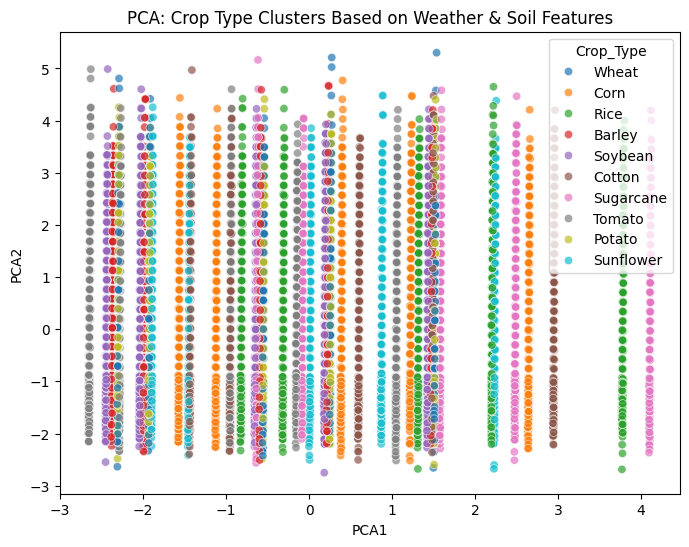

Explained variance ratio: [0.36982428 0.24279213]


In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define the weather + soil features (target 'Crop_Yield' 제외)
features = ['Temperature','Humidity','Wind_Speed',
            'Soil_pH','N','P','K','Soil_Quality']

X = df[features]

# 2. Standardize the features (PCA 전에는 스케일링 필수)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
pca = PCA(n_components=2)   # 2차원으로 축소 (시각화 목적)
X_pca = pca.fit_transform(X_scaled)

# 4. 결과 DataFrame으로 정리
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1','PCA2'])
pca_df['Crop_Type'] = df['Crop_Type']   # 색상 구분용

# 5. 시각화
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Crop_Type', alpha=0.7, palette='tab10')
plt.title("PCA: Crop Type Clusters Based on Weather & Soil Features")
plt.show()

# 6. 각 주성분이 설명하는 분산 비율 확인
print("Explained variance ratio:", pca.explained_variance_ratio_)

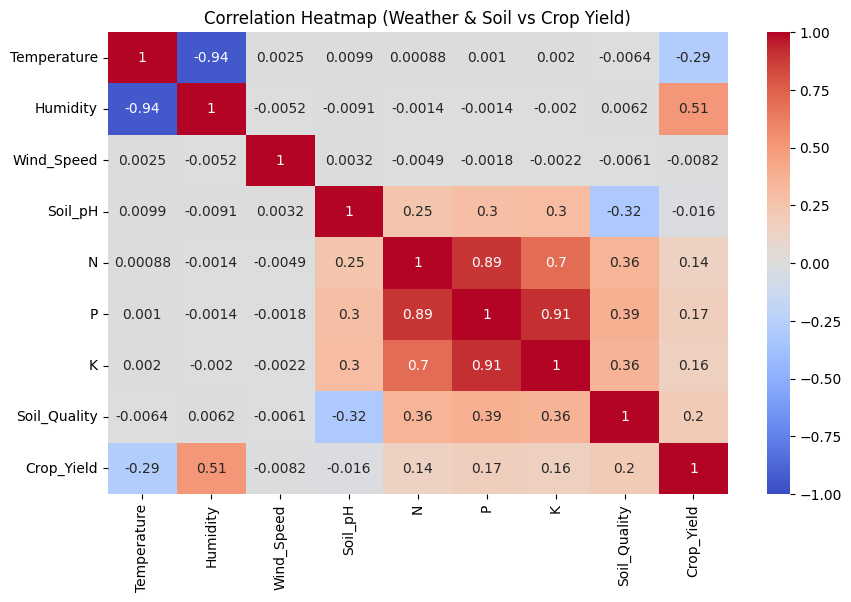

In [43]:
# Define relevant features (weather + soil + target)
features = ['Temperature','Humidity','Wind_Speed',
            'Soil_pH','N','P','K','Soil_Quality','Crop_Yield']

# Select subset of DataFrame
corr_df = df[features]

# Calculate correlations
plt.figure(figsize=(10,6))
sns.heatmap(corr_df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Weather & Soil vs Crop Yield)")
plt.show()

In [44]:
# Correlation of each variable with Crop_Yield
correlations = df[features].corr()['Crop_Yield'].sort_values(ascending=False)
print(correlations)

Crop_Yield      1.000000
Humidity        0.511951
Soil_Quality    0.197755
P               0.166614
K               0.155379
N               0.143744
Wind_Speed     -0.008203
Soil_pH        -0.016397
Temperature    -0.287932
Name: Crop_Yield, dtype: float64


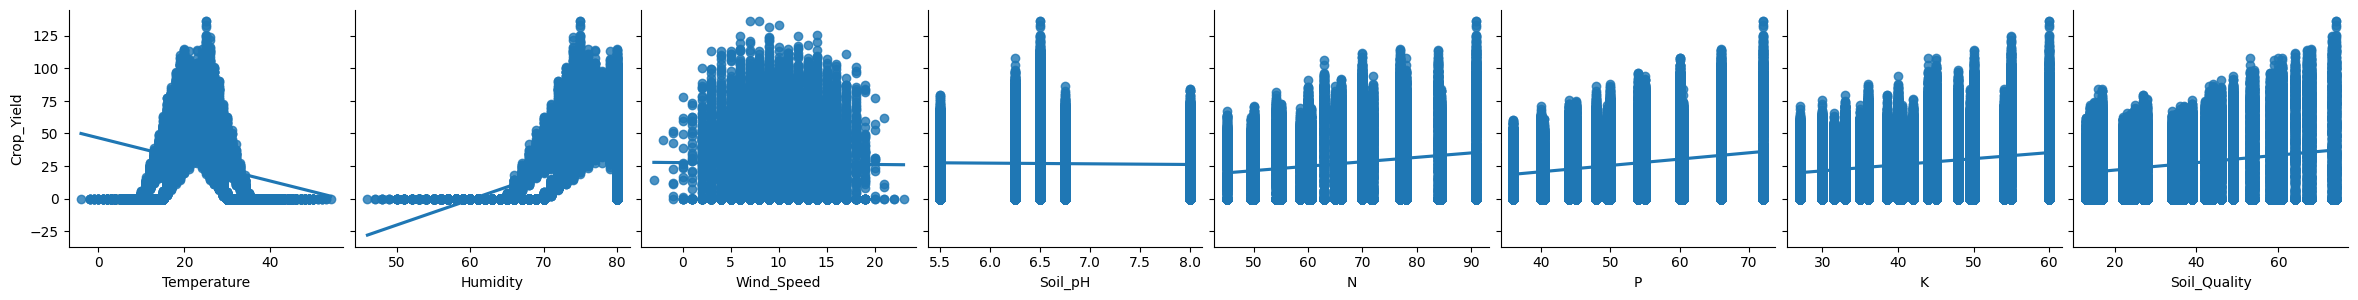

In [45]:
sns.pairplot(df[features], y_vars=["Crop_Yield"], 
             x_vars=['Temperature','Humidity','Wind_Speed','Soil_pH','N','P','K','Soil_Quality'], 
             kind='reg', height=3, aspect=1)
plt.show()

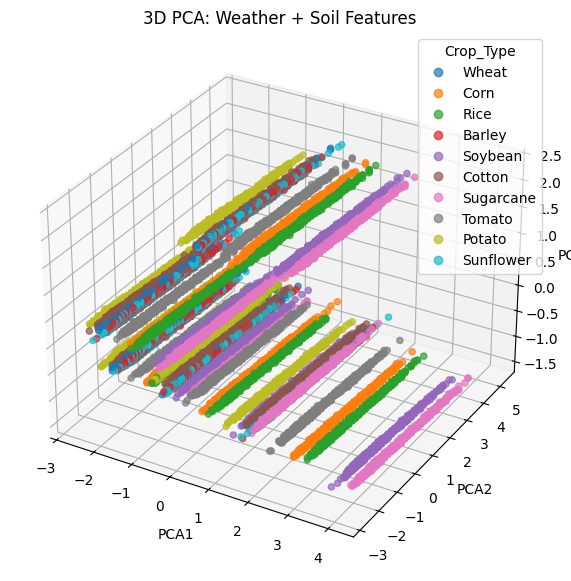

Explained variance ratio: [0.36982428 0.24279213 0.16444156]
Total variance explained: 0.7770579663137949


In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# 1. Weather + Soil features (exclude Crop_Yield)
features = ['Temperature','Humidity','Wind_Speed',
            'Soil_pH','N','P','K','Soil_Quality']
X = df[features]

# 2. Standardize (PCA requires scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA → 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 4. Create DataFrame for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1','PCA2','PCA3'])
pca_df['Crop_Type'] = df['Crop_Type']  # For coloring

# 5. 3D Visualization
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with Crop_Type coloring
scatter = ax.scatter(
    pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'],
    c=pca_df['Crop_Type'].astype('category').cat.codes,
    cmap='tab10', alpha=0.7
)

ax.set_title("3D PCA: Weather + Soil Features")
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")

# 6. Legend (fix: use both handles and labels OR map manually)
handles, _ = scatter.legend_elements()   # get handles from scatter
unique_types = pca_df['Crop_Type'].unique()  # original crop names
ax.legend(handles, unique_types, title="Crop_Type")

plt.show()

# 7. Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())
